<a href="https://colab.research.google.com/github/issarbhavya/ML/blob/main/03_convolutional_NN_%26_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# calling/importing data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-07-26 20:09:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.214.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   164MB/s    in 0.6s    

2023-07-26 20:09:42 (164 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# visualising the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print("no. of dir = ", len(dirnames),"no. of images =",len(filenames))

no. of dir =  2 no. of images = 0
no. of dir =  2 no. of images = 0
no. of dir =  0 no. of images = 250
no. of dir =  0 no. of images = 250
no. of dir =  2 no. of images = 0
no. of dir =  0 no. of images = 750
no. of dir =  0 no. of images = 750


In [ ]:
### lets visualise some images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):
  # setting up target directory to view images from here
  target_folder= target_dir + target_class
  print("target folder is :",target_folder,"\n\n")

  #getting image randomly
  r_img= random.sample(os.listdir(target_folder),1)
  print(r_img)
  print("\n\n we get image inside list through random so slicing 1st element at 0th index for use:",r_img[0])

  img= mpimg.imread(target_folder + "/" + r_img[0])
  plt.imshow(img)
  plt.title(target_class)

  print("\n\n",img.shape)

  return img



target folder is : pizza_steak/train/pizza 


['413710.jpg']


 we get image inside list through random so slicing 1st element at 0th index for use: 413710.jpg


 (512, 512, 3)


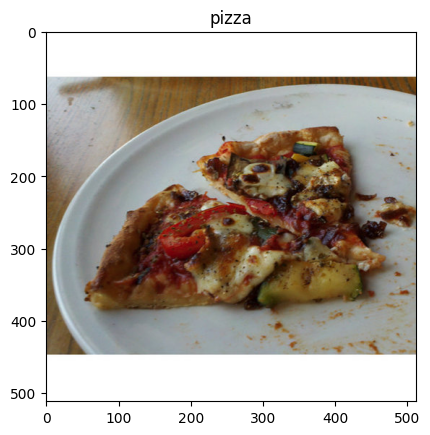

In [18]:
img=view_random_image(target_dir="pizza_steak/train/",
    target_class="pizza"
)

In [ ]:
img

array([[[112,  81,  79],
        [113,  82,  80],
        [114,  83,  80],
        ...,
        [147, 123, 123],
        [171, 146, 152],
        [201, 178, 186]],

       [[112,  81,  79],
        [113,  82,  80],
        [114,  83,  80],
        ...,
        [163, 137, 138],
        [190, 165, 169],
        [218, 195, 201]],

       [[117,  86,  83],
        [117,  86,  83],
        [117,  86,  83],
        ...,
        [172, 146, 145],
        [186, 161, 164],
        [202, 177, 181]],

       ...,

       [[  8,   6,   7],
        [  9,   7,   8],
        [ 10,   8,   9],
        ...,
        [171, 167, 182],
        [169, 167, 180],
        [170, 170, 182]],

       [[  8,   6,   7],
        [  9,   7,   8],
        [ 10,   8,   9],
        ...,
        [177, 173, 188],
        [176, 174, 187],
        [178, 176, 189]],

       [[  8,   6,   7],
        [  8,   6,   7],
        [  9,   7,   8],
        ...,
        [176, 172, 187],
        [179, 177, 190],
        [184, 182, 195]]

In [ ]:
## converting into tensor data

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[112,  81,  79],
        [113,  82,  80],
        [114,  83,  80],
        ...,
        [147, 123, 123],
        [171, 146, 152],
        [201, 178, 186]],

       [[112,  81,  79],
        [113,  82,  80],
        [114,  83,  80],
        ...,
        [163, 137, 138],
        [190, 165, 169],
        [218, 195, 201]],

       [[117,  86,  83],
        [117,  86,  83],
        [117,  86,  83],
        ...,
        [172, 146, 145],
        [186, 161, 164],
        [202, 177, 181]],

       ...,

       [[  8,   6,   7],
        [  9,   7,   8],
        [ 10,   8,   9],
        ...,
        [171, 167, 182],
        [169, 167, 180],
        [170, 170, 182]],

       [[  8,   6,   7],
        [  9,   7,   8],
        [ 10,   8,   9],
        ...,
        [177, 173, 188],
        [176, 174, 187],
        [178, 176, 189]],

       [[  8,   6,   7],
        [  8,   6,   7],
        [  9,   7,   8],
        ...,
        [176, 172, 18

In [ ]:
## normalizing our data

img/255

array([[[0.43921569, 0.31764706, 0.30980392],
        [0.44313725, 0.32156863, 0.31372549],
        [0.44705882, 0.3254902 , 0.31372549],
        ...,
        [0.57647059, 0.48235294, 0.48235294],
        [0.67058824, 0.57254902, 0.59607843],
        [0.78823529, 0.69803922, 0.72941176]],

       [[0.43921569, 0.31764706, 0.30980392],
        [0.44313725, 0.32156863, 0.31372549],
        [0.44705882, 0.3254902 , 0.31372549],
        ...,
        [0.63921569, 0.5372549 , 0.54117647],
        [0.74509804, 0.64705882, 0.6627451 ],
        [0.85490196, 0.76470588, 0.78823529]],

       [[0.45882353, 0.3372549 , 0.3254902 ],
        [0.45882353, 0.3372549 , 0.3254902 ],
        [0.45882353, 0.3372549 , 0.3254902 ],
        ...,
        [0.6745098 , 0.57254902, 0.56862745],
        [0.72941176, 0.63137255, 0.64313725],
        [0.79215686, 0.69411765, 0.70980392]],

       ...,

       [[0.03137255, 0.02352941, 0.02745098],
        [0.03529412, 0.02745098, 0.03137255],
        [0.03921569, 0

# steps of making a cnn module


load images

preprocess them(convert into tf ready data)

build cnn to find patterns

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# loading and preprocessing

tf.random.set_seed(42)

## converting pixel values between 0 nd 1

#generates batches of tensor image data amd data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#setting paths
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


## importing data from dir and turning into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#takes path to a dir and generates batches of augemented data
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

# the result is 47 coz, there are 47 batches of data

# the main reason behind making batches is so that our computer dosen't run
# out of memory by working on everything alltogether,
# so it tries to find features in 1st batch then in 2nd and so on

47

In [ ]:
1500/32

46.875

In [ ]:
### building cnn model

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 150ms/step - loss: 0.5826 - accuracy: 0.7033 - val_loss: 0.4651 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4784 - accuracy: 0.7780 - val_loss: 0.4212 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4560 - accuracy: 0.7940 - val_loss: 0.3800 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3925 - accuracy: 0.8267 - val_loss: 0.3752 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.2993 - accuracy: 0.8793 - val_loss: 0.3868 - val_accuracy: 0.8320


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, # use same validation data created above
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 0.7016 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 125ms/step - loss: 3.5495 - accuracy: 0.6347 - val_loss: 0.5050 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6959 - accuracy: 0.7360 - val_loss: 1.3605 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6306 - accuracy: 0.7513 - val_loss: 1.2989 - val_accuracy: 0.5260
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5885 - accuracy: 0.7473 - val_loss: 0.5295 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5094 - accuracy: 0.7780 - val_loss: 0.5221 - val_accuracy: 0.7560



My gosh, the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.


This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.